In [1]:
from extreme_classification.distributions import multivariate_logistic_distribution
from extreme_classification.extreme_dataset import ExtremeDataset
import numpy as np

In [5]:
def generate_data(n_samples, n_features, alphas):
    Xs = []
    ys = []
    for k, alpha in enumerate(alphas):
        X = multivariate_logistic_distribution(n_samples, n_features, alpha)
        y = np.zeros(n_samples) + k
        Xs.append(X)
        ys.append(y)

    X = np.concatenate(Xs)
    y = np.concatenate(ys)
    return X, y

X, y = generate_data(100000, 2, [0.1, 0.7])
dataset = ExtremeDataset(X, y)
X = dataset.X
y = dataset.y

In [6]:
def plot_data(X, y):
    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

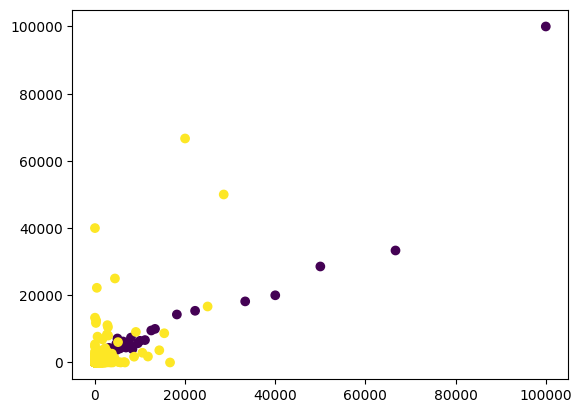

Label distribution:  [100000 100000]


In [7]:
plot_data(X, y)
print("Label distribution: ", np.bincount(y.astype(int)))

In [8]:
# redefine features with radius and angle

theta = np.arctan2(X[:, 1], X[:, 0])
r = np.sqrt(X[:, 0]**2 + X[:, 1]**2)

print("theta: ", theta.shape)
print("r: ", r.shape)

X = np.stack([r, theta], axis=1)
print("X: ", X.shape)

theta:  (200000,)
r:  (200000,)
X:  (200000, 2)


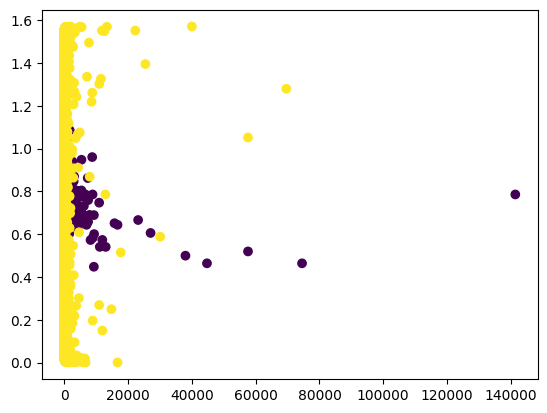

In [9]:
# plot the data again
plot_data(X, y)

In [14]:
dataset = ExtremeDataset(X, y, ranktransform=True)
print("Optimal theorical k: ", np.sqrt(dataset.X.shape[0]))

Optimal theorical k:  447.21359549995793


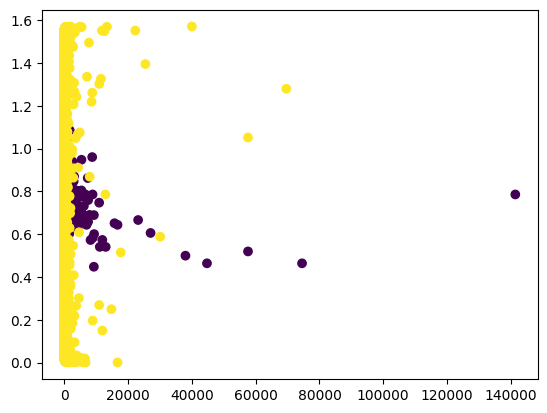

In [13]:
plot_data
plot_data(dataset.X, dataset.y)

In [39]:
from sklearn.ensemble import ExtraTreesClassifier

ks = np.linspace(10, 10000, 100).astype(int)
print("ks: ", ks)

def compute_influence(dataset, k):
    clf = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
    X_extreme, y_extreme = dataset.get_extreme(k)
    clf.fit(X_extreme, y_extreme)
    return clf.feature_importances_


ks:  [   10   110   211   312   413   514   615   716   817   918  1019  1120
  1220  1321  1422  1523  1624  1725  1826  1927  2028  2129  2230  2330
  2431  2532  2633  2734  2835  2936  3037  3138  3239  3340  3440  3541
  3642  3743  3844  3945  4046  4147  4248  4349  4450  4550  4651  4752
  4853  4954  5055  5156  5257  5358  5459  5560  5660  5761  5862  5963
  6064  6165  6266  6367  6468  6569  6670  6770  6871  6972  7073  7174
  7275  7376  7477  7578  7679  7780  7880  7981  8082  8183  8284  8385
  8486  8587  8688  8789  8890  8990  9091  9192  9293  9394  9495  9596
  9697  9798  9899 10000]


In [40]:
influence_r = []
influence_theta = []

for k in ks:
    influence = compute_influence(dataset, k)
    influence_r.append(influence[0])
    influence_theta.append(influence[1])

import matplotlib.pyplot as plt
plt.plot(ks, influence_r, label="r")
plt.plot(ks, influence_theta, label="theta")
plt.legend()
plt.show()